In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import dsn.lib.LowRank.Fig1_Spontaneous.fct_mf as mf

from dsn.util.tf_DMFT_solvers import rank2_CDD_static_solve

DTYPE = tf.float64

cA = np.arange(0, 1.01, .1)
n = cA.shape[0]

_delta_0_init = 10.0*np.ones((n,))

_g = 0.8*np.ones((n,))
_rhom = 1.6*np.ones((n,)) 
_rhon = 3.0*np.ones((n,))
_betam = 0.6*np.ones((n,))
_betan = 1.0*np.ones((n,))

kappa1_init = tf.placeholder(dtype=DTYPE, shape=(n,))
kappa2_init = tf.placeholder(dtype=DTYPE, shape=(n,))
delta_0_init = tf.placeholder(dtype=DTYPE, shape=(n,))
delta_inf_init = tf.placeholder(dtype=DTYPE, shape=(n,))

g = tf.placeholder(dtype=DTYPE, shape=(n,))
rhom = tf.placeholder(dtype=DTYPE, shape=(n,))
rhon = tf.placeholder(dtype=DTYPE, shape=(n,))
betam = tf.placeholder(dtype=DTYPE, shape=(n,))
betan = tf.placeholder(dtype=DTYPE, shape=(n,))

its = 1500
eps  = 0.1

gqp = 200


## context A

In [2]:
cBs = [0, 1]
kappa_signs = [-1, 1]
num_cBs = len(cBs)
num_kappa_signs = len(kappa_signs)

gammaA = 0.08*np.ones((n,))
gammaB = -0.14*np.ones((n,))

kappa1s = np.zeros((num_cBs,num_kappa_signs,n,its+1))
kappa2s = np.zeros((num_cBs,num_kappa_signs,n,its+1))
delta_0s = np.zeros((num_cBs,num_kappa_signs,n,its+1))
zs = np.zeros((num_cBs,num_kappa_signs,n))

for i in range(num_cBs):
    cB = cBs[i]
    for j in range(num_kappa_signs):
        kappa_sign = kappa_signs[j]
        print('cB', cB, 'kappa sign', kappa_sign)
        _kappa1_init = kappa_sign*2.2*np.ones((n,))
        _kappa2_init = kappa_sign*2.0*np.ones((n,))

        kappa1, kappa2, delta_0, z, xs = rank2_CDD_static_solve(kappa1_init, kappa2_init, delta_0_init, \
                                                         cA, cB, \
                                                         g, rhom, rhon, betam, betan, \
                                                         gammaA, gammaB, \
                                                         its, eps, gauss_quad_pts=gqp, db=True)
        
        feed_dict = {kappa1_init:_kappa1_init, kappa2_init:_kappa2_init, delta_0_init:_delta_0_init, \
                     g:_g, rhom:_rhom, rhon:_rhon, betam:_betam, betan:_betan}
        
        with tf.Session() as sess:
            _kappa1, _kappa2, _delta_0, _z, _xs = sess.run([kappa1, kappa2, delta_0, z, xs], feed_dict)
                
        kappa1s[i,j] = _xs[:,0,:]
        kappa2s[i,j] = _xs[:,1,:]
        delta_0s[i,j] = _xs[:,2,:]
        zs[i,j,:] = _z


cB 0 kappa sign -1
cB 0 kappa sign 1
cB 1 kappa sign -1
cB 1 kappa sign 1


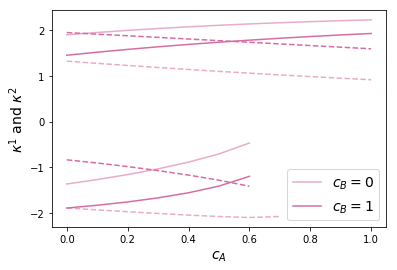

In [10]:
palette1 = [ '#E8ABCA', '#D56DA1', '#99004C', '#520029']
fontsize = 14
plt.figure()
for i in range(num_cBs):
    cB = cBs[i]
    label = r'$c_B = %d$' % cB
    for j in range(num_kappa_signs):
        kappa_sign = kappa_signs[j]
        ind = num_kappa_signs*i + j
        if (kappa_sign == -1):
            kappa1_inds = kappa1s[i,j,:,-1] < 0
            kappa2_inds = kappa2s[i,j,:,-1] < 0
            plt.plot(cA[kappa1_inds], kappa1s[i,j,kappa1_inds,-1], color=palette1[i])
            plt.plot(cA[kappa2_inds], kappa2s[i,j,kappa2_inds,-1], color=palette1[i], linestyle='--')
        else:
            plt.plot(cA, kappa1s[i,j,:,-1], color=palette1[i], label=label)
            plt.plot(cA, kappa2s[i,j,:,-1], color=palette1[i], linestyle='--')
plt.xlabel(r'$c_A$', fontsize=fontsize)
plt.ylabel(r'$\kappa^1$ and $\kappa^2$', fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

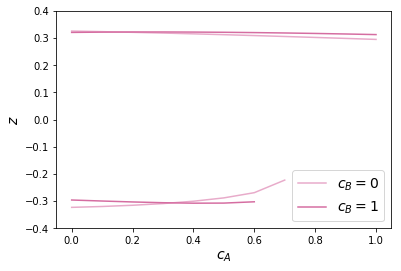

In [16]:
palette1 = [ '#E8ABCA', '#D56DA1', '#99004C', '#520029']
fontsize = 14
plt.figure()
for i in range(num_cBs):
    cB = cBs[i]
    label = r'$c_B = %d$' % cB
    for j in range(num_kappa_signs):
        kappa_sign = kappa_signs[j]
        ind = num_kappa_signs*i + j
        if (kappa_sign == -1):
            z_inds = zs[i,j,:] < 0
            plt.plot(cA[z_inds], zs[i,j,z_inds], color=palette1[i])
        else:
            plt.plot(cA, zs[i,j,:], color=palette1[i], label=label)
plt.xlabel(r'$c_A$', fontsize=fontsize)
plt.ylabel(r'$z$', fontsize=fontsize)
plt.ylim([-.4, .4])
plt.legend(fontsize=fontsize)
plt.show()

In [18]:
np.savez('rank2_CDD_static_ctxA.npz', kappa1s=kappa1s, kappa2s=kappa2s, delta_0s=delta_0s, zs=zs)

## context B

In [20]:
gammaA = -0.14*np.ones((n,))
gammaB = 0.08*np.ones((n,))

kappa1s = np.zeros((num_cBs,num_kappa_signs,n,its+1))
kappa2s = np.zeros((num_cBs,num_kappa_signs,n,its+1))
delta_0s = np.zeros((num_cBs,num_kappa_signs,n,its+1))
zs = np.zeros((num_cBs,num_kappa_signs,n))

for i in range(num_cBs):
    cB = cBs[i]
    for j in range(num_kappa_signs):
        kappa_sign = kappa_signs[j]
        print('cB', cB, 'kappa sign', kappa_sign)
        _kappa1_init = kappa_sign*2.2*np.ones((n,))
        _kappa2_init = kappa_sign*2.0*np.ones((n,))

        kappa1, kappa2, delta_0, z, xs = rank2_CDD_static_solve(kappa1_init, kappa2_init, delta_0_init, \
                                                         cA, cB, \
                                                         g, rhom, rhon, betam, betan, \
                                                         gammaA, gammaB, \
                                                         its, eps, gauss_quad_pts=gqp, db=True)
        
        feed_dict = {kappa1_init:_kappa1_init, kappa2_init:_kappa2_init, delta_0_init:_delta_0_init, \
                     g:_g, rhom:_rhom, rhon:_rhon, betam:_betam, betan:_betan}
        
        with tf.Session() as sess:
            _kappa1, _kappa2, _delta_0, _z, _xs = sess.run([kappa1, kappa2, delta_0, z, xs], feed_dict)
                
        kappa1s[i,j] = _xs[:,0,:]
        kappa2s[i,j] = _xs[:,1,:]
        delta_0s[i,j] = _xs[:,2,:]
        zs[i,j,:] = _z



cB 0 kappa sign -1
cB 0 kappa sign 1
cB 1 kappa sign -1
cB 1 kappa sign 1


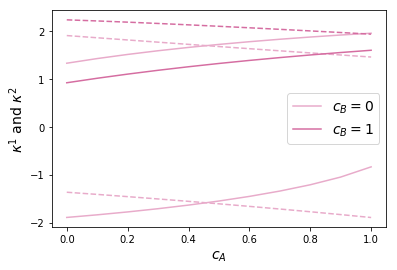

In [21]:
palette1 = [ '#E8ABCA', '#D56DA1', '#99004C', '#520029']
fontsize = 14
plt.figure()
for i in range(num_cBs):
    cB = cBs[i]
    label = r'$c_B = %d$' % cB
    for j in range(num_kappa_signs):
        kappa_sign = kappa_signs[j]
        ind = num_kappa_signs*i + j
        if (kappa_sign == -1):
            kappa1_inds = kappa1s[i,j,:,-1] < 0
            kappa2_inds = kappa2s[i,j,:,-1] < 0
            plt.plot(cA[kappa1_inds], kappa1s[i,j,kappa1_inds,-1], color=palette1[i])
            plt.plot(cA[kappa2_inds], kappa2s[i,j,kappa2_inds,-1], color=palette1[i], linestyle='--')
        else:
            plt.plot(cA, kappa1s[i,j,:,-1], color=palette1[i], label=label)
            plt.plot(cA, kappa2s[i,j,:,-1], color=palette1[i], linestyle='--')
plt.xlabel(r'$c_A$', fontsize=fontsize)
plt.ylabel(r'$\kappa^1$ and $\kappa^2$', fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

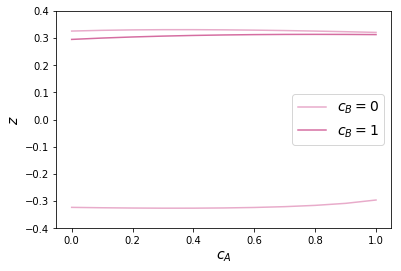

In [22]:
palette1 = [ '#E8ABCA', '#D56DA1', '#99004C', '#520029']
fontsize = 14
plt.figure()
for i in range(num_cBs):
    cB = cBs[i]
    label = r'$c_B = %d$' % cB
    for j in range(num_kappa_signs):
        kappa_sign = kappa_signs[j]
        ind = num_kappa_signs*i + j
        if (kappa_sign == -1):
            z_inds = zs[i,j,:] < 0
            plt.plot(cA[z_inds], zs[i,j,z_inds], color=palette1[i])
        else:
            plt.plot(cA, zs[i,j,:], color=palette1[i], label=label)
plt.xlabel(r'$c_A$', fontsize=fontsize)
plt.ylabel(r'$z$', fontsize=fontsize)
plt.ylim([-.4, .4])
plt.legend(fontsize=fontsize)
plt.show()

In [ ]:
## Visualize langevin dynamical simulation

In [23]:
np.savez('rank2_CDD_static_ctxB.npz', kappa1s=kappa1s, kappa2s=kappa2s, delta_0s=delta_0s, zs=zs)

In [24]:
npzfile = np.load('rank2_CDD_static_ctxA.npz')

kappa1s = npzfile['kappa1s']

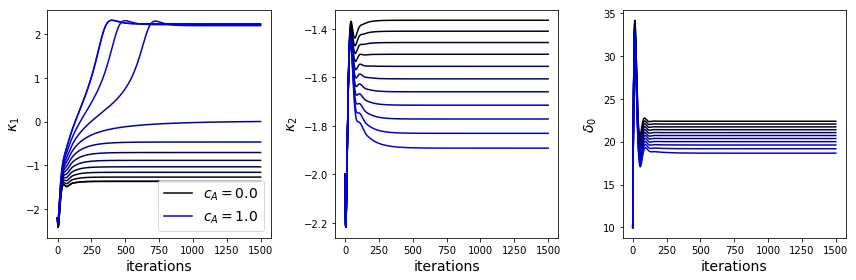

In [35]:
fig, axs = plt.subplots(1,3,figsize=(12,4))
for i in range(n):
    if (i in [0, n-1]):
        axs[0].plot(kappa1s[0,0,i,:], c=[0,0,float(i)/float(n)], label=r'$c_A = %.1f$' % cA[i])
    axs[0].plot(kappa1s[0,0,i,:], c=[0,0,float(i)/float(n)])
    axs[1].plot(kappa2s[0,0,i,:], c=[0,0,float(i)/float(n)])
    axs[2].plot(delta_0s[0,0,i,:], c=[0,0,float(i)/float(n)])

axs[0].legend(fontsize=fontsize)
for i in range(3):
    axs[i].set_xlabel('iterations', fontsize=fontsize)
axs[0].set_ylabel(r'$\kappa_1$', fontsize=fontsize)
axs[1].set_ylabel(r'$\kappa_2$', fontsize=fontsize)
axs[2].set_ylabel(r'$\delta_0$', fontsize=fontsize)
plt.tight_layout()